## Facebook API 介接

In [17]:
import requests
#ACCESSTOKEN = 'EAAC'
APPID = '155917025115555'
APPSECRET = 'e45cd62d5f9098e57799a071614c686a'
ACCESSTOKEN = '{}|{}'.format(APPID,APPSECRET)
res = requests.get('https://graph.facebook.com/v2.12/DoctorKoWJ/posts?access_token={}'.format(ACCESSTOKEN))

In [18]:
jd = res.json()

In [19]:
import pandas
df = pandas.DataFrame(jd['data'])
df.head(3)

,created_time,id,message,story
0,2018-02-08T03:51:12+0000,136845026417486_1238197629615548,地震震垮了建築物，震不垮台灣人的團結。\n\n截至目前爲止，台北市政府已經出動53人、3台車...,NaN
1,2018-02-06T18:47:02+0000,136845026417486_1237095403059104,0206強震，台北市內無重大災情，因此稍早北市搜救隊一共30人已經在松山機場集合，且已由軍機...,NaN
2,2018-02-06T10:28:53+0000,136845026417486_1236405593128085,【出訪筆記：土耳其】\n\n橫跨歐亞的土耳其，本來就是台灣進軍中東市場的重要跳板，作為第一個...,NaN


## 抓取591

In [35]:
import requests
headers = {
 'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'   
}
res = requests.get('https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow=30&totalRows=718', headers = headers)
jd = res.json()

In [36]:
import pandas
df = pandas.DataFrame(jd['data']['data'])
df.head(3)

,addInfo,addition2,addition3,addition4,addr_number_name,address,address_img,address_img_title,alley_name,allfloor,...,storeprice,street_name,streetid,type,unit,updatetime,user_id,vipBorder,vipimg,vipstyle
0,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,209號,金山南路二段[屋主自租免..,[屋主自租免仲介費]三面採光古亭東門師大,[屋主自租免仲介費]三面採光古亭東門師大,,4,...,0,金山南路二段,25642,1,元/月,1516537049,672616,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip
1,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,,信義路三段大安森林公園旁..,"大安森林公園旁,高品質生活景觀宅","大安森林公園旁,高品質生活景觀宅",,10,...,0,信義路三段,25647,1,元/月,1517386676,1088138,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip
2,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,65號,龍泉街WELIVE時尚捷運兩房..,WELIVE時尚捷運兩房新、乾淨、便宜,WELIVE時尚捷運兩房新、乾淨、便宜,,5,...,0,龍泉街,25676,1,元/月,1518076303,1327815,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip


In [37]:
df = df[['address','floor','allfloor','layout','area','price','browsenum_all']]
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all
0,金山南路二段[屋主自租免..,2,4,2房2廳1衛,26.0,"32,500",1048
1,信義路三段大安森林公園旁..,3,10,2房2廳1衛,23.0,"38,000",477
2,龍泉街WELIVE時尚捷運兩房..,4,5,2房1廳1衛,20.0,"22,800",696
3,敦化南路一段160巷SOGO捷..,4,4,2房1廳1衛,10.0,"25,000",1823
4,忠孝東路四段216巷明曜靜..,2,7,4房2廳2衛,50.0,"50,000",488


In [39]:
df.to_excel('house591.xlsx')

In [40]:
#https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow=30&totalRows=718
#https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow=60&totalRows=718

In [56]:
import requests
headers = {
 'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'   
}
url = 'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow={}&totalRows=718'

house_ary = []
for i in range(0,int(718 / 30) + 1):
    res = requests.get(url.format(i*30), headers = headers)
    jd = res.json()
    df = pandas.DataFrame(jd['data']['data'])
    df = df[['id','address','floor','allfloor','layout','area','price','browsenum_all']]
    house_ary.append(df)

In [57]:
len(house_ary)

24

In [58]:
df = pandas.concat(house_ary)

In [59]:
df['price'] = df['price'].map(lambda e: int(e.replace(',', '')))

In [65]:
df.sort_values('browsenum_all', ascending=False).head(3)

,id,address,floor,allfloor,layout,area,price,browsenum_all
29,5991006,愛國東路學生公寓，屋主..,3,4,6房2廳6衛,66.0,8800,4469
17,5989953,羅斯福路三段333巷限女性台大..,5,5,2房0廳1衛,17.0,11900,3459
19,6028693,建國南路一段291巷必定排隊搶..,7,14,3房2廳2衛,32.0,33000,3013


In [62]:
df.to_excel('house591.xlsx')

In [63]:
house = pandas.read_excel('house591.xlsx')

In [64]:
house.head(3)

,id,address,floor,allfloor,layout,area,price,browsenum_all
0,6018145,四維路52巷大安站全新飯店..,4,5,2房1廳1衛,22.0,35000,2293
1,6030022,信義路三段台北大安森林公..,12,14,1房2廳1衛,14.0,36000,909
2,6049021,忠孝東路四段223巷﻿﻿忠..,4,7,3房2廳2衛,39.6,46000,405


## 抓取自由時報的資料

In [67]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://news.ltn.com.tw/list/breakingnews')
soup = BeautifulSoup(res.text, 'lxml')

In [83]:
news_ary = []

for news in soup.select('.imm li'):
    title  = news.select_one('a.tit p').text.strip()
    dt     = news.select_one('a.tit span').text.strip()
    url    = news.select_one('a.tit')['href']
    tag    = ','.join([ele.text for ele in news.select_one('.tagarea').select('.immtag')])
    news_ary.append({'title':title, 'dt':dt, 'url':url,'tag':tag})
    #print('===============================')

In [85]:
newsdf = pandas.DataFrame(news_ary)
newsdf.head()

,dt,tag,title,url
0,11:04,"社會,花蓮縣",雲門翠堤續搜救突破201號房地板 徒手開挖中,http://news.ltn.com.tw/news/society/breakingne...
1,10:57,國際,女醉倒賭城路邊 股溝男當眾猥褻笑嗨嗨,http://news.ltn.com.tw/news/world/breakingnews...
2,10:53,"社會,臺中市",暗夜惡火 女子疑逃生不及葬身火窟,http://news.ltn.com.tw/news/society/breakingne...
3,10:50,"生活,花蓮縣",國興六街拆樓清出瓦斯桶 業者怨想搬受阻,http://news.ltn.com.tw/news/life/breakingnews/...
4,10:48,"社會,臺東縣",黑鷹墜诲 紀德艦加入搜索,http://news.ltn.com.tw/news/society/breakingne...


In [86]:
newsdf.to_excel('ltn.xlsx')

In [82]:
l = ['a', 'b', 'c']
';'.join(l)

'a;b;c'

### 591 社區資料

In [268]:
import requests
res = requests.get('https://www.591.com.tw/index.php?module=newCommunity&action=listIndex&firstRow=20&totalRows=11924', headers = headers )
jd = res.json()

In [271]:
#jd.get('subContent')

## 資料清理 

In [88]:
a = [1,3,5,7,9]
b = [2,4,6,8,10]

for i in range(0, len(a)):
    print(a[i] * b[i])

2
12
30
56
90


In [91]:
for i,j in zip(a,b):
    print(i * j)

2
12
30
56
90


In [92]:
[i * j for i,j in zip(a,b)]

[2, 12, 30, 56, 90]

In [93]:
import numpy

a = [1,3,5,7,9]
b = [2,4,6,8,10]

na = numpy.array(a)
nb = numpy.array(b)

In [96]:
na * nb

array([ 2, 12, 30, 56, 90])

In [97]:
na - nb

array([-1, -1, -1, -1, -1])

In [98]:
import numpy as np
a = [1,2,3,4,5]
na = np.array(a)

In [101]:
na[0]

1

In [103]:
na[1:3]

array([2, 3])

In [104]:
na > 3

array([False, False, False,  True,  True], dtype=bool)

In [105]:
na[na > 3]

array([4, 5])

In [106]:
na = np.array(
    [
        [1,2,3,4,5],
        [6,7,8,9,10]
    ])

In [108]:
na[0,0]

1

In [109]:
na[0,:]

array([1, 2, 3, 4, 5])

In [110]:
na[:,0]

array([1, 6])

In [111]:
na.T

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [112]:
na=np.array([
    ['frank','M',29],
    ['mary','F',23],
    ['tom','M',35],
    ['ted','M',33],
    ['jean','F',21],
    ['lisa','F',20]
])

In [113]:
na

array([['frank', 'M', '29'],
       ['mary', 'F', '23'],
       ['tom', 'M', '35'],
       ['ted', 'M', '33'],
       ['jean', 'F', '21'],
       ['lisa', 'F', '20']],
      dtype='<U5')

In [115]:
na=np.array([
    ['name', 'gender', 'age'],
    ['frank','M',29],
    ['mary','F',23],
    ['tom','M',35],
    ['ted','M',33],
    ['jean','F',21],
    ['lisa','F',20]
])

In [117]:
na

array([['name', 'gender', 'age'],
       ['frank', 'M', '29'],
       ['mary', 'F', '23'],
       ['tom', 'M', '35'],
       ['ted', 'M', '33'],
       ['jean', 'F', '21'],
       ['lisa', 'F', '20']],
      dtype='<U6')

In [118]:
na[1:,:]

array([['frank', 'M', '29'],
       ['mary', 'F', '23'],
       ['tom', 'M', '35'],
       ['ted', 'M', '33'],
       ['jean', 'F', '21'],
       ['lisa', 'F', '20']],
      dtype='<U6')

In [119]:
na[1:,1]

array(['M', 'F', 'M', 'M', 'F', 'F'],
      dtype='<U6')

In [120]:
import pandas
df = pandas.DataFrame([
    ['frank','M',29],
    ['mary','F',23],
    ['tom','M',35],
    ['ted','M',33],
    ['jean','F',21],
    ['lisa','F',20]
])

In [121]:
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [122]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [123]:
df.columns = ['name', 'gender', 'age']

In [124]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [127]:
import pandas as pd
s=pd.Series([21000,18900,18000])
s

0    21000
1    18900
2    18000
dtype: int64

In [128]:
s=pd.Series([21000,18900,18000],index=['Iphone','Edge S7','HTC M1'])
s

Iphone     21000
Edge S7    18900
HTC M1     18000
dtype: int64

In [129]:
s= pd.Series({'Iphone':21000,'Edge S7':18900,'HTC M1':18000})
s

Edge S7    18900
HTC M1     18000
Iphone     21000
dtype: int64

In [131]:
s[2]

21000

In [132]:
s[1:3]

HTC M1    18000
Iphone    21000
dtype: int64

In [134]:
s['Iphone']

21000

In [135]:
s[['Iphone', 'Edge S7']]

Iphone     21000
Edge S7    18900
dtype: int64

In [136]:
s < 20000

Edge S7     True
HTC M1      True
Iphone     False
dtype: bool

In [137]:
s[s<20000]

Edge S7    18900
HTC M1     18000
dtype: int64

In [138]:
cheap = s < 20000
cheap

Edge S7     True
HTC M1      True
Iphone     False
dtype: bool

In [139]:
s[cheap]

Edge S7    18900
HTC M1     18000
dtype: int64

In [140]:
s['Iphone']

21000

In [141]:
s['Iphone'] = 20000

In [142]:
s['Iphone']

20000

In [143]:
s

Edge S7    18900
HTC M1     18000
Iphone     20000
dtype: int64

In [145]:
s[s<20000] * 0.8

Edge S7    15120.0
HTC M1     14400.0
dtype: float64

In [146]:
s[s<20000]=s[s<20000] * 0.8
s

Edge S7    15120
HTC M1     14400
Iphone     20000
dtype: int64

In [147]:
'Iphone' in s

True

In [148]:
'mi' in s

False

In [149]:
s * 0.8

Edge S7    12096.0
HTC M1     11520.0
Iphone     16000.0
dtype: float64

In [151]:
import numpy as np
#print(dir(np))
np.sqrt(s)

Edge S7    122.963409
HTC M1     120.000000
Iphone     141.421356
dtype: float64

In [152]:
s.max()

20000

In [153]:
s.mean()

16506.666666666668

In [154]:
s.describe()

count        3.000000
mean     16506.666667
std       3046.659373
min      14400.000000
25%      14760.000000
50%      15120.000000
75%      17560.000000
max      20000.000000
dtype: float64

In [155]:
s[['Iphone','HTC M1']]

Iphone    20000
HTC M1    14400
dtype: int64

In [156]:
s[['mi','HTC M1']]

mi            NaN
HTC M1    14400.0
dtype: float64

In [157]:
s2 = s[['Iphone','HTC M1']] + s[['mi','HTC M1']]

In [158]:
s2

HTC M1    28800.0
Iphone        NaN
mi            NaN
dtype: float64

In [160]:
s2.isnull()

HTC M1    False
Iphone     True
mi         True
dtype: bool

In [162]:
sum(s2.isnull())

2

In [163]:
s2.notnull()

HTC M1     True
Iphone    False
mi        False
dtype: bool

In [164]:
sum(s2.notnull())

1

## 讓電腦將聲音轉成文字
- pip install SpeechRecognition
- pip install pyaudio

In [165]:
! pip install SpeechRecognition

In [167]:
! pip install pyaudio

In [169]:
import speech_recognition
r = speech_recognition.Recognizer()

with speech_recognition.Microphone() as source:
    r.adjust_for_ambient_noise(source)
    audio = r.listen(source)
    
r.recognize_google(audio, language='zh-TW')

'大家好'

In [171]:
def listenTo():
    r = speech_recognition.Recognizer()

    with speech_recognition.Microphone() as source:
        r.adjust_for_ambient_noise(source)
        audio = r.listen(source)

    return r.recognize_google(audio, language='zh-TW')

In [170]:
from gtts import gTTS
from pygame import mixer
import tempfile

mixer.init()

def speak(sentence):
    with tempfile.NamedTemporaryFile(delete=True) as fp:
        tts = gTTS(text=sentence, lang='zh')
        tts.save("{}.mp3".format(fp.name))
        mixer.music.load('{}.mp3'.format(fp.name))
        mixer.music.play()
        

In [182]:
import requests
def getWeather():
    res = requests.get('https://works.ioa.tw/weather/api/weathers/1.json')
    temp = res.json()['felt_air_temp']
    
    return '現在溫度是 {} 度'.format(temp)

In [189]:
import requests
from bs4 import BeautifulSoup
term = '冬季奧運'

def getwiki(term):
    if '請搜尋' in term:
        term = term.strip('請搜尋')
        res = requests.get('https://zh.wikipedia.org/wiki/{}'.format(term))
        soup = BeautifulSoup(res.text,'lxml')
        return soup.select_one('#mw-content-text p').text

In [183]:
qa = {
    '早安': '你也早安',
    '你好帥': '你也好帥',
    '我的老天鵝': '九四八七九四狂',
    '誰是最帥的': '當然是你呀',
    '請告訴我天氣': getWeather()
}

In [185]:
speak(qa.get(listenTo(), '我現在聽不懂你的問題, 但當我變聰明以後, 我就會回答了'))

In [195]:
speak(getwiki(listenTo()))

## Pandas DataFrame

In [196]:
df=pd.DataFrame([['frank','M',29],['mary','F',23],['tom','M',35],['ted','M',33],['jean','F',21],['lisa','F',20]])
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [197]:
df.columns=['name','gender','age']
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [198]:
df=pd.DataFrame([['frank','M',29],['mary','F',23],['tom','M',35],['ted','M',33],['jean','F',21],['lisa','F',20]],columns=['name','gender','age'])
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [199]:
df=pd.DataFrame([{'name':'frank','gender':'M','age':29},\
                 {'name':'mary','gender':'F','age':23},\
                 {'name':'tom','gender':'M','age':35},\
                 {'name':'ted','gender':'M','age':33},\
                 {'name':'jean','gender':'F','age':21},\
                 {'name':'lisa','gender':'F','age':20}])
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [200]:
df=pd.DataFrame([{'name':'frank','gender':'M','age':29},\
                 {'name':'mary','gender':'F'}\
                 ])
df

,age,gender,name
0,29.0,M,frank
1,NaN,F,mary


In [201]:
df=pd.DataFrame([{'name':'frank','gender':'M','age':29},\
                 {'name':'mary','gender':'F','age':23},\
                 {'name':'tom','gender':'M','age':35},\
                 {'name':'ted','gender':'M','age':33},\
                 {'name':'jean','gender':'F','age':21},\
                 {'name':'lisa','gender':'F','age':20}])
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [203]:
?df.head()

In [204]:
df.head(3)

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom


In [206]:
df.tail(3)

,age,gender,name
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
age       6 non-null int64
gender    6 non-null object
name      6 non-null object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [208]:
df.describe()

,age
count,6.000000
mean,26.833333
std,6.400521
min,20.000000
25%,21.500000
50%,26.000000
75%,32.000000
max,35.000000


In [209]:
df.dtypes

age        int64
gender    object
name      object
dtype: object

In [211]:
df.iloc[0]

age          29
gender        M
name      frank
Name: 0, dtype: object

In [212]:
df.iloc[1]

age         23
gender       F
name      mary
Name: 1, dtype: object

In [213]:
df.ix[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


age          29
gender        M
name      frank
Name: 0, dtype: object

In [214]:
df.ix[1:4]

,age,gender,name
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean


In [216]:
df['name']

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [217]:
df.name

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [218]:
df[['name', 'age']]

,name,age
0,frank,29
1,mary,23
2,tom,35
3,ted,33
4,jean,21
5,lisa,20


In [220]:
df.loc[ 0:3 , ['name','age'] ]

,name,age
0,frank,29
1,mary,23
2,tom,35
3,ted,33


In [223]:
df[df['gender'] == 'M']

,age,gender,name
0,29,M,frank
2,35,M,tom
3,33,M,ted


In [226]:
(df['gender'] == 'M') & (df['age'] >= 30)

0    False
1    False
2     True
3     True
4    False
5    False
dtype: bool

In [227]:
df[(df['gender'] == 'M') & (df['age'] >= 30)]

,age,gender,name
2,35,M,tom
3,33,M,ted


In [228]:
df[(df['gender'] == 'M') | (df['age'] >= 30)]

,age,gender,name
0,29,M,frank
2,35,M,tom
3,33,M,ted


In [229]:
df['employee'] = True

In [230]:
df

,age,gender,name,employee
0,29,M,frank,True
1,23,F,mary,True
2,35,M,tom,True
3,33,M,ted,True
4,21,F,jean,True
5,20,F,lisa,True


In [231]:
def nameConvert(gender):
    if gender == 'M':
        return 'Male'
    else:
        return 'Female'
    
df['fullgender'] = df['gender'].map(nameConvert)

In [233]:
df['fullgender2'] = df['gender'].map(\
            lambda gender: 'Male' \
            if gender == 'M' else 'Female')

In [234]:
df

,age,gender,name,employee,fullgender,fullgender2
0,29,M,frank,True,Male,Male
1,23,F,mary,True,Female,Female
2,35,M,tom,True,Male,Male
3,33,M,ted,True,Male,Male
4,21,F,jean,True,Female,Female
5,20,F,lisa,True,Female,Female


In [235]:
del df['fullgender2']

In [238]:
df = df.drop('fullgender', 1)

In [239]:
df.head(3)

,age,gender,name,employee
0,29,M,frank,True
1,23,F,mary,True
2,35,M,tom,True


In [241]:
df.loc[6]={'age':20,'gender':'F','name':'qoo', 'employee':True}
df

,age,gender,name,employee
0,29,M,frank,True
1,23,F,mary,True
2,35,M,tom,True
3,33,M,ted,True
4,21,F,jean,True
5,20,F,lisa,True
6,20,F,qoo,True


In [243]:
df = df.append(pd.DataFrame([{'age':20,'gender':'F','name':'qoo'}]),ignore_index=True)

In [246]:
df.drop(6, inplace=True)

In [248]:
df = df.drop(7)

In [249]:
df.tail()

,age,employee,gender,name
1,23,True,F,mary
2,35,True,M,tom
3,33,True,M,ted
4,21,True,F,jean
5,20,True,F,lisa


In [250]:
df['userid'] = range(101,107)

In [253]:
df.set_index('userid', inplace=True)

In [254]:
df

,age,employee,gender,name
userid,,,,
101,29,True,M,frank
102,23,True,F,mary
103,35,True,M,tom
104,33,True,M,ted
105,21,True,F,jean
106,20,True,F,lisa


In [255]:
df.iloc[1]

age           23
employee    True
gender         F
name        mary
Name: 102, dtype: object

In [256]:
df.iloc[[1,3,5]]

,age,employee,gender,name
userid,,,,
102,23,True,F,mary
104,33,True,M,ted
106,20,True,F,lisa


In [257]:
df.loc[[101,103,105]]

,age,employee,gender,name
userid,,,,
101,29,True,M,frank
103,35,True,M,tom
105,21,True,F,jean


In [258]:
df.loc[[101,103,105], ['name' , 'age']]

,name,age
userid,,
101,frank,29
103,tom,35
105,jean,21


## Yahoo 股票

In [287]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://tw.stock.yahoo.com/h/getclass.php')
soup = BeautifulSoup(res.text, 'lxml' )
domain = 'https://tw.stock.yahoo.com'
#url_list = [domain + ele.get('href') for ele in  soup.select('#market table td a') if ele.get('href') and 'c=' in ele.get('href')]
url_list = [domain + ele.get('href') for ele in soup.select('#market table td a') if ele.get('href')]
#url_list[0:3]
#requests.get('https://tw.stock.yahoo.com/s/list.php?c=')

In [298]:
import pandas
def getStockDetail(url):
    dfs = pandas.read_html(url)
    df = dfs[4]
    df.columns = df.iloc[4]
    df.drop([0,1,2,3, 4], inplace=True)
    return df

In [301]:
getStockDetail(url_list[5]).head(3)

4,選擇,股票代號,時間,成交,買進,賣出,漲跌,張數,昨收,開盤,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,NaN,1301 台塑,13:30,97.8,97.8,98.2,▽2.2,14130,100.0,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1303 南亞,14:30,76.0,76.0,76.3,▽1.7,11543,77.7,75.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,1304 台聚,14:30,14.55,14.55,14.60,▽0.15,1175,14.70,14.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 自由時報

In [306]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://news.ltn.com.tw/list/breakingnews')
soup = BeautifulSoup(res.text, 'lxml')
#soup.select('.imm li')
#soup.select('.list li')
#soup.select('.list.imm li')
#soup.select('.imm.list li')

## 抓取股票資料

In [307]:
! pip install pandas-datareader

  Running setup.py bdist_wheel for requests-ftp: started
  Running setup.py bdist_wheel for requests-ftp: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\76\fb\0d\1026eb562c34a4982dc9d39c9c582a734eefe7f0455f711deb
Successfully built requests-ftp


In [311]:
import pandas_datareader 
faamg = pandas_datareader.get_data_google(['FB','AAPL', 'AMZN','MSFT', 'GOOGL' ])['Close']
#faamg

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\google\daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title', 'source']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


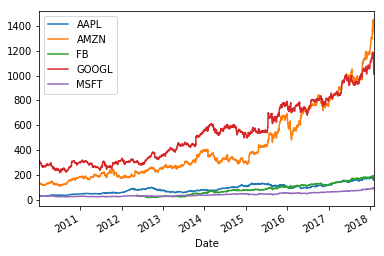

In [312]:
%pylab inline
faamg.plot(kind= 'line')

## 處理缺失值

In [314]:
import pandas as pd
import numpy as np
df=pd.DataFrame([\
                 ['frank','M',np.nan],\
                 ['mary',np.nan,np.nan],\
                 ['tom','M',35],\
                 ['ted','M',33],\
                 ['jean',np.nan,21],\
                 ['lisa','F',20]])
df.columns=['name','gender','age']
df

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [317]:
df['gender'].notnull()

0     True
1    False
2     True
3     True
4    False
5     True
Name: gender, dtype: bool

In [318]:
df['gender'].isnull()

0    False
1     True
2    False
3    False
4     True
5    False
Name: gender, dtype: bool

In [320]:
df['gender'].isnull().any()

True

In [321]:
df['name'].isnull().any()

False

In [322]:
df['gender'].notnull().any()

True

In [323]:
df['name'].notnull().any()

True

In [324]:
df['gender'].notnull().all()

False

In [325]:
df['name'].notnull().all()

True

In [328]:
df['gender'].isnull().sum()

2

In [329]:
df.isnull().sum()

name      0
gender    2
age       2
dtype: int64

In [330]:
df.isnull().sum().sum()

4

In [336]:
import pandas as pd
import numpy as np
df=pd.DataFrame([\
                 ['frank','M',np.nan],\
                 ['mary',np.nan,np.nan],\
                 ['tom','M',35],\
                 ['ted','M',33],\
                 ['jean',np.nan,21],\
                 ['lisa','F',20]])
df.columns=['name','gender','age']
df

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [337]:
df

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [338]:
#df.dropna(inplace=True)
df.dropna()

,name,gender,age
2,tom,M,35.0
3,ted,M,33.0
5,lisa,F,20.0


In [340]:
df['salary'] = np.nan
df
#df.dropna(how = 'all')

,name,gender,age,salary
0,frank,M,NaN,NaN
1,mary,NaN,NaN,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,NaN,21.0,NaN
5,lisa,F,20.0,NaN


In [342]:
df.dropna(how = 'all',axis=1)

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [343]:
df.dropna(thresh=2)

,name,gender,age,salary
0,frank,M,NaN,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,NaN,21.0,NaN
5,lisa,F,20.0,NaN


In [344]:
df.fillna(0)

,name,gender,age,salary
0,frank,M,0.0,0.0
1,mary,0,0.0,0.0
2,tom,M,35.0,0.0
3,ted,M,33.0,0.0
4,jean,0,21.0,0.0
5,lisa,F,20.0,0.0


In [345]:
df['gender'].fillna('M')

0    M
1    M
2    M
3    M
4    M
5    F
Name: gender, dtype: object

In [346]:
df['salary'].fillna(0)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: salary, dtype: float64

In [351]:
df['age'].fillna(df['age'].mean())

0    27.25
1    27.25
2    35.00
3    33.00
4    21.00
5    20.00
Name: age, dtype: float64

In [356]:
#df['age'] = 
df['age'].fillna(df.groupby(['gender'])['age'].transform(mean))

0    34.0
1     NaN
2    35.0
3    33.0
4    21.0
5    20.0
Name: age, dtype: float64

In [357]:
df.fillna(method='pad')

,name,gender,age,salary
0,frank,M,NaN,NaN
1,mary,M,NaN,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,M,21.0,NaN
5,lisa,F,20.0,NaN


In [359]:
df.fillna(method='bfill')

,name,gender,age,salary
0,frank,M,35.0,NaN
1,mary,M,35.0,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,F,21.0,NaN
5,lisa,F,20.0,NaN


In [360]:
df.fillna(method='bfill',limit=2)

,name,gender,age,salary
0,frank,M,35.0,NaN
1,mary,M,35.0,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,F,21.0,NaN
5,lisa,F,20.0,NaN


In [361]:
df2=pd.DataFrame([[1,870],\
                  [2,900],\
                  [np.nan,np.nan],\
                  [4,950],\
                  [5,1080],\
                  [6,1200]])
df2.columns=['time','val']
df2.interpolate()

,time,val
0,1.0,870.0
1,2.0,900.0
2,3.0,925.0
3,4.0,950.0
4,5.0,1080.0
5,6.0,1200.0


## 資料轉換

In [430]:
import requests
headers = {
 'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'   
}
url = 'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow={}&totalRows=718'

house_ary = []
for i in range(0,int(718 / 30) + 1):
    res = requests.get(url.format(i*30), headers = headers)
    jd = res.json()
    df = pandas.DataFrame(jd['data']['data'])
    #print(df.columns)
    df = df[['id','address','floor','allfloor','floorInfo','layout','area','price','browsenum_all']]
    house_ary.append(df)
    print(i)
house = pandas.concat(house_ary)
house.to_csv('rent_591_sample.csv', encoding='utf-8-sig')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [388]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample.csv', \
                     encoding='utf-8', index_col=0)
df.head(3)

,id,address,floor,allfloor,layout,area,price,browsenum_all
0,6032971,永康街47巷永康街五樓頂加..,5,5,5房3廳3衛,46.8,"60,000",751
1,6054083,仁愛路四段仁愛路樹海景觀..,7,12,4房2廳2衛,76.9,"100,000",162
2,5957980,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,"150,000",2385


In [389]:
df['square_feet'] = df['area'] / 0.3025

In [390]:
import numpy
numpy.sqrt(df['area']).head(3)

0    6.841053
1    8.769265
2    8.443933
Name: area, dtype: float64

In [391]:
('格局:' + df['layout'] ).head(3)

0    格局:5房3廳3衛
1    格局:4房2廳2衛
2    格局:4房2廳2衛
Name: layout, dtype: object

In [392]:
def normalizePrice(price):
    return int(price.replace(',',''))

#df['price'].map(normalizePrice)
df['price'].map(lambda price: int(price.replace(',','')) ).head()

0     60000
1    100000
2    150000
3     29000
4     31800
Name: price, dtype: int64

In [393]:
df2 =pandas.DataFrame(\
                     [\
                      [60,70,50],\
                      [80,79,68],\
                      [63,66,82]],\
                     columns=['First','Second','Third'])
df2.apply(lambda e:e.max()-e.min(), axis=1)

0    20
1    12
2    19
dtype: int64

In [394]:
df2.apply(lambda e:e.max()-e.min(), axis=0)

First     20
Second    13
Third     32
dtype: int64

In [395]:
df3 =pandas.DataFrame(\
                     [\
                      [60,70,np.nan],\
                      [np.nan,79,68],\
                      [63,np.nan,82]],\
                     columns=['First','Second','Third'])
df3.fillna(0)

,First,Second,Third
0,60.0,70.0,0.0
1,0.0,79.0,68.0
2,63.0,0.0,82.0


In [396]:
df3.applymap(lambda e: 0 if pandas.isnull(e) else e)

,First,Second,Third
0,60.0,70.0,0.0
1,0.0,79.0,68.0
2,63.0,0.0,82.0


## 處理時間格式資料

In [397]:
dt  = '2018/02/10'
dt1 = '2019/1/1'
dt1 - dt

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [398]:
from datetime import datetime
current_time = datetime.now()
current_time

datetime.datetime(2018, 2, 10, 16, 32, 46, 717520)

In [399]:
current_time.strftime('%Y-%m-%d')

'2018-02-10'

In [400]:
datetime.strptime('2017-08-21','%Y-%m-%d')

datetime.datetime(2017, 8, 21, 0, 0)

In [401]:
dt  = datetime.strptime('2018/02/10','%Y/%m/%d')
dt1 = datetime.strptime('2019/1/1','%Y/%m/%d')
dt1 - dt

datetime.timedelta(325)

In [403]:
from datetime import timedelta
current_time - timedelta(days = 1)

datetime.datetime(2018, 2, 9, 16, 32, 46, 717520)

In [406]:
from datetime import timedelta
for i in range(1,15):
    dt = current_time - timedelta(days = i)
    print(dt.strftime('%Y-%m-%d'))
    #print(current_time - timedelta(days = i))

2018-02-09
2018-02-08
2018-02-07
2018-02-06
2018-02-05
2018-02-04
2018-02-03
2018-02-02
2018-02-01
2018-01-31
2018-01-30
2018-01-29
2018-01-28
2018-01-27


In [409]:
from time import mktime
#mktime(current_time.timetuple())
current_time.timetuple()
mktime(current_time.timetuple())

1518251566.0

In [410]:
datetime.fromtimestamp(1518251566.0)

datetime.datetime(2018, 2, 10, 16, 32, 46)

In [417]:
datetime.fromtimestamp(86400.0)

datetime.datetime(1970, 1, 2, 8, 0)

In [419]:
df['search_date'] = '2018/02/10'

In [421]:
df['search_date'] = pandas.to_datetime(df['search_date'],format='%Y/%m/%d')

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 29
Data columns (total 10 columns):
id               720 non-null int64
address          720 non-null object
floor            720 non-null int64
allfloor         720 non-null int64
layout           720 non-null object
area             720 non-null float64
price            720 non-null object
browsenum_all    720 non-null int64
square_feet      720 non-null float64
search_date      720 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 61.9+ KB


In [426]:
(df['search_date'] >= '2018-02-12').head()

0    False
1    False
2    False
3    False
4    False
Name: search_date, dtype: bool

In [427]:
import requests
#requests.get

get = 123
print(get)
from requests import get
print(get)

123
<function get at 0x00000000081CE378>


## 創建虛擬變量


In [434]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/23500ef59b000982b44b5e04850e455658fd704c/data/rent_591_sample.csv', \
                     encoding='utf-8', index_col=0)
df.head(3)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328


In [437]:
df['building_use'].value_counts()

電梯大樓/整層住家    15635
電梯大樓/獨立套房     8777
透天厝/獨立套房      8024
公寓/獨立套房       5346
電梯大樓/辦公       5322
公寓/整層住家       2962
公寓/分租套房       2920
透天厝/店面        2261
透天厝/分租套房      2218
電梯大樓/店面       2053
透天厝/整層住家      1546
公寓/店面         1228
公寓/雅房         1212
電梯大樓/分租套房     1122
透天厝/雅房         950
電梯大樓/住辦        610
別墅/獨立套房        557
電梯大樓/雅房        464
別墅/整層住家        437
公寓/辦公          293
透天厝/住辦         226
公寓/住辦          209
透天厝/辦公         200
電梯大樓/其他        193
別墅/分租套房        144
透天厝/其他         124
倉庫/其他           54
別墅/店面           53
別墅/其他           43
廠房/其他           35
別墅/雅房           35
公寓/其他           31
廠辦/其他           22
別墅/住辦           16
別墅/辦公            5
其他/其他            3
Name: building_use, dtype: int64

In [439]:
pandas.get_dummies(df['building_use']).head()

,倉庫/其他,公寓/住辦,公寓/其他,公寓/分租套房,公寓/店面,公寓/整層住家,公寓/獨立套房,公寓/辦公,公寓/雅房,其他/其他,...,透天厝/辦公,透天厝/雅房,電梯大樓/住辦,電梯大樓/其他,電梯大樓/分租套房,電梯大樓/店面,電梯大樓/整層住家,電梯大樓/獨立套房,電梯大樓/辦公,電梯大樓/雅房
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [441]:
df2 = pandas.concat([df, pandas.get_dummies(df['building_use'])], axis = 1)

In [442]:
df2.head(3)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,...,透天厝/辦公,透天厝/雅房,電梯大樓/住辦,電梯大樓/其他,電梯大樓/分租套房,電梯大樓/店面,電梯大樓/整層住家,電梯大樓/獨立套房,電梯大樓/辦公,電梯大樓/雅房
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,...,0,0,0,0,0,0,0,0,0,0
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,...,0,0,0,0,0,0,0,0,0,0
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,...,0,0,0,0,1,0,0,0,0,0


In [444]:
#del df2['building_use']
df2.drop('building_use', axis = 1, inplace=True)

In [445]:
df2.head(3)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,latitude,longitude,...,透天厝/辦公,透天厝/雅房,電梯大樓/住辦,電梯大樓/其他,電梯大樓/分租套房,電梯大樓/店面,電梯大樓/整層住家,電梯大樓/獨立套房,電梯大樓/辦公,電梯大樓/雅房
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,22.878436,120.250810,...,0,0,0,0,0,0,0,0,0,0
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,25.081558,121.461868,...,0,0,0,0,0,0,0,0,0,0
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,25.010293,121.511328,...,0,0,0,0,1,0,0,0,0,0


In [453]:
a = pandas.DataFrame([\
         ['M' ,'Eng', 20],\
         ['M' ,'Eng', 30],\
         ['F' ,'Eng', 27],\
         ['F' ,'Sales', 25],\
         ['M' ,'CEO', 55]])

In [455]:
a.columns = ['gender' , 'profession', 'age']

In [457]:
a.pivot_table(index='gender', \
                   columns='profession', values='age', aggfunc = mean)

profession,CEO,Eng,Sales
gender,,,
F,NaN,27.0,25.0
M,55.0,25.0,NaN


In [460]:
df['price'] = df['price'].map(lambda e : int(e.strip('元/月').replace(',', ''))) 

In [461]:
df2=df.pivot_table(index='search_date',columns='building_use',values='price',aggfunc=sum)
df2.head()

building_use,倉庫/其他,公寓/住辦,公寓/其他,公寓/分租套房,公寓/店面,公寓/整層住家,公寓/獨立套房,公寓/辦公,公寓/雅房,其他/其他,...,透天厝/辦公,透天厝/雅房,電梯大樓/住辦,電梯大樓/其他,電梯大樓/分租套房,電梯大樓/店面,電梯大樓/整層住家,電梯大樓/獨立套房,電梯大樓/辦公,電梯大樓/雅房
search_date,,,,,,,,,,,,,,,,,,,,,
2017-05-08,72325.0,371500.0,58500.0,1224399.0,4490600.0,4241986.0,2321837.0,1173780.0,401067.0,6000.0,...,121000.0,203499.0,1110800.0,177814.0,453899.0,10574484.0,31536697.0,5276459.0,21835522.0,105900.0
2017-05-09,236744.0,159000.0,42999.0,1579138.0,3362400.0,4206235.0,3048561.0,855900.0,366199.0,NaN,...,392000.0,178000.0,968399.0,579000.0,408299.0,6219799.0,30583975.0,6233755.0,28541573.0,129700.0
2017-05-10,63748.0,494800.0,NaN,2035480.0,7132600.0,5572385.0,5193507.0,1165900.0,493833.0,NaN,...,646800.0,236900.0,1840888.0,825934.0,748549.0,31005928.0,53833067.0,9925236.0,60122996.0,227300.0
2017-05-11,108200.0,242600.0,11000.0,1643348.0,4824099.0,5068078.0,3147599.0,464000.0,583450.0,3500.0,...,314700.0,405470.0,1219550.0,3648149.0,800399.0,12785298.0,46318253.0,7419697.0,29084108.0,229480.0
2017-05-12,60800.0,1096300.0,75000.0,4318694.0,10924080.0,7866946.0,9554327.0,2882900.0,1069600.0,NaN,...,795300.0,608850.0,4139359.0,734820.0,1517399.0,30397667.0,45193426.0,15130740.0,88289435.0,464600.0


In [464]:
df2.apply(sum,axis = 0)

building_use
倉庫/其他          1363415.0
公寓/住辦          5873999.0
公寓/其他           564799.0
公寓/分租套房       23132463.0
公寓/店面         81392263.0
公寓/整層住家       57290660.0
公寓/獨立套房       44367539.0
公寓/辦公         12772987.0
公寓/雅房          6793158.0
其他/其他            17100.0
別墅/住辦           940100.0
別墅/其他          2576700.0
別墅/分租套房         871831.0
別墅/店面          2421098.0
別墅/整層住家       22684795.0
別墅/獨立套房        3579754.0
別墅/辦公           236000.0
別墅/雅房           167580.0
廠房/其他          2683200.0
廠辦/其他          2215000.0
透天厝/住辦         8044798.0
透天厝/其他         3978899.0
透天厝/分租套房      12840487.0
透天厝/店面       154401452.0
透天厝/整層住家      33155785.0
透天厝/獨立套房      51023508.0
透天厝/辦公         6686700.0
透天厝/雅房         3885338.0
電梯大樓/住辦       25806079.0
電梯大樓/其他       16157589.0
電梯大樓/分租套房      9187936.0
電梯大樓/店面      247863513.0
電梯大樓/整層住家    536152115.0
電梯大樓/獨立套房    104321424.0
電梯大樓/辦公      692235420.0
電梯大樓/雅房        2644674.0
dtype: float64

In [465]:
df2.apply(sum,axis = 1)

search_date
2017-05-08    100143491.0
2017-05-09    104455584.0
2017-05-10    203479468.0
2017-05-11    137852559.0
2017-05-12    272465726.0
2017-05-13    810254203.0
2017-05-14    462885341.0
2017-05-15     88793786.0
dtype: float64

In [466]:
df3=df.pivot_table(index='building_use',columns='search_date',values='price',aggfunc=sum)
df3.head()

search_date,2017-05-08,2017-05-09,2017-05-10,2017-05-11,2017-05-12,2017-05-13,2017-05-14,2017-05-15
building_use,,,,,,,,
倉庫/其他,72325.0,236744.0,63748.0,108200.0,60800.0,231348.0,590250.0,NaN
公寓/住辦,371500.0,159000.0,494800.0,242600.0,1096300.0,1600499.0,1487800.0,421500.0
公寓/其他,58500.0,42999.0,NaN,11000.0,75000.0,234300.0,143000.0,NaN
公寓/分租套房,1224399.0,1579138.0,2035480.0,1643348.0,4318694.0,6571657.0,5744947.0,14800.0
公寓/店面,4490600.0,3362400.0,7132600.0,4824099.0,10924080.0,24972598.0,20999686.0,4686200.0


In [469]:
df2.T.head()

search_date,2017-05-08,2017-05-09,2017-05-10,2017-05-11,2017-05-12,2017-05-13,2017-05-14,2017-05-15
building_use,,,,,,,,
倉庫/其他,72325.0,236744.0,63748.0,108200.0,60800.0,231348.0,590250.0,NaN
公寓/住辦,371500.0,159000.0,494800.0,242600.0,1096300.0,1600499.0,1487800.0,421500.0
公寓/其他,58500.0,42999.0,NaN,11000.0,75000.0,234300.0,143000.0,NaN
公寓/分租套房,1224399.0,1579138.0,2035480.0,1643348.0,4318694.0,6571657.0,5744947.0,14800.0
公寓/店面,4490600.0,3362400.0,7132600.0,4824099.0,10924080.0,24972598.0,20999686.0,4686200.0


In [473]:
df['btype']=df['building_use'].map(lambda e:str(e).split('/')[0])

In [474]:
df['buse']=df['building_use'].map(lambda e:str(e).split('/')[1] if len(str(e).split('/'))>1 else None)

In [475]:
df[['building_use', 'btype','buse']].head()

,building_use,btype,buse
0,透天厝/獨立套房,透天厝,獨立套房
1,透天厝/獨立套房,透天厝,獨立套房
2,電梯大樓/分租套房,電梯大樓,分租套房
3,透天厝/獨立套房,透天厝,獨立套房
4,透天厝/分租套房,透天厝,分租套房


In [476]:
df_multi_idx=df.pivot_table(index=['btype','buse'],columns='search_date',values='price',aggfunc=sum)

In [478]:
df_multi_idx.head()

search_date  2017-05-08  2017-05-09  2017-05-10  2017-05-11  2017-05-12  \
btype buse                                                                
倉庫    其他        72325.0    236744.0     63748.0    108200.0     60800.0   
公寓    住辦       371500.0    159000.0    494800.0    242600.0   1096300.0   
      其他        58500.0     42999.0         NaN     11000.0     75000.0   
      分租套房    1224399.0   1579138.0   2035480.0   1643348.0   4318694.0   
      店面      4490600.0   3362400.0   7132600.0   4824099.0  10924080.0   

search_date  2017-05-13  2017-05-14  2017-05-15  
btype buse                                       
倉庫    其他       231348.0    590250.0         NaN  
公寓    住辦      1600499.0   1487800.0    421500.0  
      其他       234300.0    143000.0         NaN  
      分租套房    6571657.0   5744947.0     14800.0  
      店面     24972598.0  20999686.0   4686200.0

In [479]:
df_wide=df_multi_idx.unstack()
df_wide.head()

search_date 2017-05-08                                                        \
buse                住辦        其他       分租套房         店面       整層住家       獨立套房   
btype                                                                          
倉庫                 NaN   72325.0        NaN        NaN        NaN        NaN   
公寓            371500.0   58500.0  1224399.0  4490600.0  4241986.0  2321837.0   
其他                 NaN    6000.0        NaN        NaN        NaN        NaN   
別墅             60000.0   27000.0    35800.0    70000.0  1743000.0   149348.0   
廠房                 NaN  116000.0        NaN        NaN        NaN        NaN   

search_date                      2017-05-09             ...    2017-05-14  \
buse                辦公        雅房         住辦        其他   ...            辦公   
btype                                                   ...                 
倉庫                 NaN       NaN        NaN  236744.0   ...           NaN   
公寓           1173780.0  401067.0   159000.0   42999.0   ...     1332610.0   
其他                 NaN       NaN        NaN       NaN   ...           NaN   
別墅                 NaN    4000.0        NaN  114800.0   ...           NaN   
廠房                 NaN       NaN        NaN   45000.0   ...           NaN   

search_date            2017-05-15                                             \
buse                雅房         住辦  其他     分租套房         店面      整層住家     獨立套房   
btype                                                                          
倉庫                 NaN        NaN NaN      NaN        NaN       NaN      NaN   
公寓           2324022.0   421500.0 NaN  14800.0  4686200.0  194800.0  65800.0   
其他                 NaN        NaN NaN      NaN        NaN       NaN      NaN   
別墅             68480.0   139800.0 NaN   7500.0   155000.0  351000.0   9900.0   
廠房                 NaN        NaN NaN      NaN        NaN       NaN      NaN   

search_date                     
buse               辦公       雅房  
btype                           
倉庫                NaN      NaN  
公寓           980994.0  10400.0  
其他                NaN      NaN  
別墅                NaN      NaN  
廠房                NaN      NaN  

[5 rows x 64 columns]

In [480]:
df_long=df_wide.stack()
df_long.head()

search_date  2017-05-08  2017-05-09  2017-05-10  2017-05-11  2017-05-12  \
btype buse                                                                
倉庫    其他        72325.0    236744.0     63748.0    108200.0     60800.0   
公寓    住辦       371500.0    159000.0    494800.0    242600.0   1096300.0   
      其他        58500.0     42999.0         NaN     11000.0     75000.0   
      分租套房    1224399.0   1579138.0   2035480.0   1643348.0   4318694.0   
      店面      4490600.0   3362400.0   7132600.0   4824099.0  10924080.0   

search_date  2017-05-13  2017-05-14  2017-05-15  
btype buse                                       
倉庫    其他       231348.0    590250.0         NaN  
公寓    住辦      1600499.0   1487800.0    421500.0  
      其他       234300.0    143000.0         NaN  
      分租套房    6571657.0   5744947.0     14800.0  
      店面     24972598.0  20999686.0   4686200.0